In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# read csv file
df = pd.read_csv('https://raw.githubusercontent.com/akwasianing/diabetes_project/refs/heads/main/data/diabetes.csv')
df.head()




,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Sample mean Glucose: 116.64
Population mean Glucose: 120.89
Sample max Glucose: 183
Population max Glucose: 199


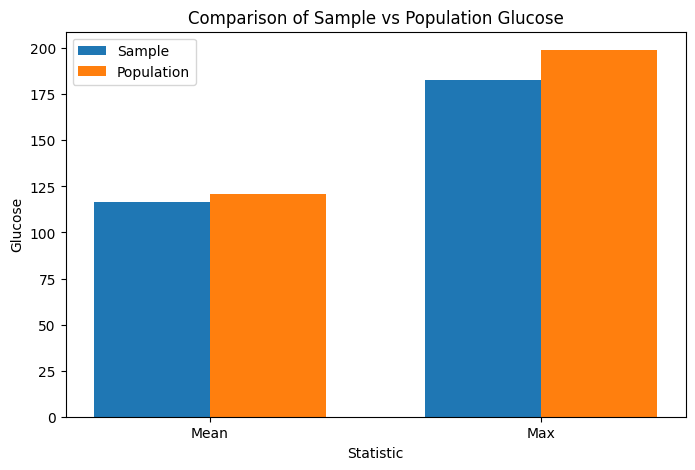

In [9]:
# set seed for reproducibility
np.random.seed(42)

# Random sample of 25
sample = df.sample(n=25)

# Calculate mean and max Glucose values for sample
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

# Calculate mean and max Glucose values for population
pop_mean_glucose = df['Glucose'].mean()
pop_max_glucose = df['Glucose'].max()

# Print values
print(f"Sample mean Glucose: {sample_mean_glucose:.2f}")
print(f"Population mean Glucose: {pop_mean_glucose:.2f}")
print(f"Sample max Glucose: {sample_max_glucose}")
print(f"Population max Glucose: {pop_max_glucose}")

# Plot
stats = ['Mean', 'Max']
sample_values = [sample_mean_glucose, sample_max_glucose]
population_values = [pop_mean_glucose, pop_max_glucose]

x = np.arange(len(stats))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, sample_values, width, label='Sample')
plt.bar(x + width/2, population_values, width, label='Population')

plt.xlabel('Statistic')
plt.ylabel('Glucose')
plt.title('Comparison of Sample vs Population Glucose')
plt.xticks(x, stats)
plt.legend()

# Save and show plot
plt.savefig('sample_vs_population_glucose.png', dpi=300, bbox_inches='tight')
plt.show()

Sample 98th percentile BMI: 45.03
Population 98th percentile BMI: 47.53


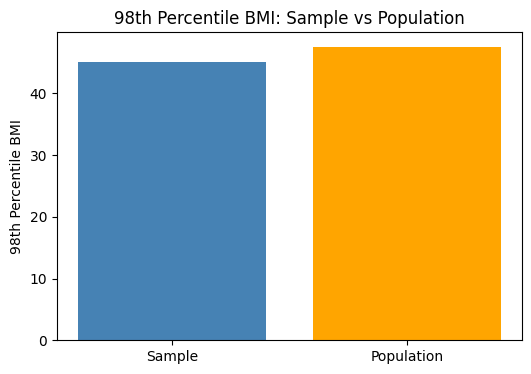

In [18]:
# 98th percentile for BMI
sample_bmi_98 = np.percentile(sample['BMI'], 98)
pop_bmi_98 = np.percentile(df['BMI'], 98)

# Print values
print(f"Sample 98th percentile BMI: {sample_bmi_98:.2f}")
print(f"Population 98th percentile BMI: {pop_bmi_98:.2f}")

# Plot
groups = ['Sample', 'Population']
values = [sample_bmi_98, pop_bmi_98]

plt.figure(figsize=(6,4))
plt.bar(groups, values, color=['steelblue', 'orange'])

plt.ylabel('98th Percentile BMI')
plt.title('98th Percentile BMI: Sample vs Population')

# Save and show plot
plt.savefig('bmi_98th_percentile_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


Bootstrap Results (average of 500 samples)
Average Bootstrap Mean BloodPressure: 69.04
Average Bootstrap Std BloodPressure: 19.25
Average Bootstrap 98th Percentile BloodPressure: 98.20

Population Statistics
Population Mean BloodPressure: 69.11
Population Std BloodPressure: 19.36
Population 98th Percentile BloodPressure: 99.32


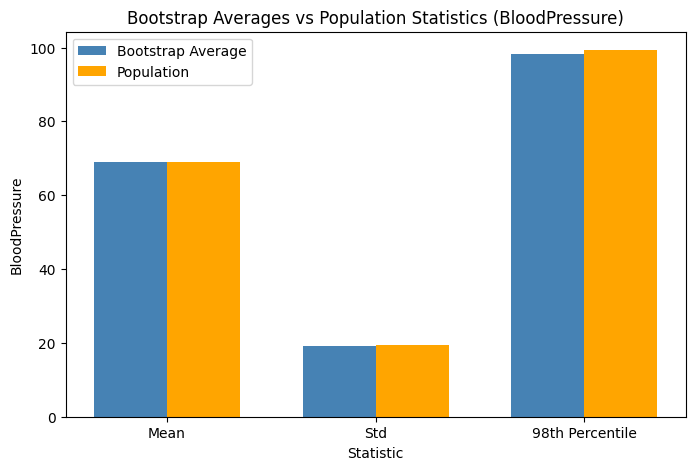

In [20]:
# Bootstrap Sampling
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

for _ in range(500):
    sample = df.sample(n=150, replace=True)
    mean_bp = sample['BloodPressure'].mean()
    std_bp = sample['BloodPressure'].std()
    perc_98_bp = np.percentile(sample['BloodPressure'], 98)

    bootstrap_means.append(mean_bp)
    bootstrap_stds.append(std_bp)
    bootstrap_percentiles.append(perc_98_bp)

# Calculate bootstrap averages
avg_bootstrap_mean = np.mean(bootstrap_means)
avg_bootstrap_std = np.mean(bootstrap_stds)
avg_bootstrap_98th = np.mean(bootstrap_percentiles)

# Calculate population statistics
pop_mean_bp = df['BloodPressure'].mean()
pop_std_bp = df['BloodPressure'].std()
pop_98th_bp = np.percentile(df['BloodPressure'], 98)

# Print results
print("\nBootstrap Results (average of 500 samples)")
print(f"Average Bootstrap Mean BloodPressure: {avg_bootstrap_mean:.2f}")
print(f"Average Bootstrap Std BloodPressure: {avg_bootstrap_std:.2f}")
print(f"Average Bootstrap 98th Percentile BloodPressure: {avg_bootstrap_98th:.2f}")

print("\nPopulation Statistics")
print(f"Population Mean BloodPressure: {pop_mean_bp:.2f}")
print(f"Population Std BloodPressure: {pop_std_bp:.2f}")
print(f"Population 98th Percentile BloodPressure: {pop_98th_bp:.2f}")

# Plot
stats = ['Mean', 'Std', '98th Percentile']
bootstrap_values = [avg_bootstrap_mean, avg_bootstrap_std, avg_bootstrap_98th]
population_values = [pop_mean_bp, pop_std_bp, pop_98th_bp]

x = np.arange(len(stats))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, bootstrap_values, width, label='Bootstrap Average', color='steelblue')
plt.bar(x + width/2, population_values, width, label='Population', color='orange')

plt.xlabel('Statistic')
plt.ylabel('BloodPressure')
plt.title('Bootstrap Averages vs Population Statistics (BloodPressure)')
plt.xticks(x, stats)
plt.legend()

# Save and show plot
plt.savefig('bootstrap_barplot_bloodpressure.png', dpi=300, bbox_inches='tight')
plt.show()